## Demo 

### Register Universe

In [1]:
from registerUniverse import register_universe_main
universe = register_universe_main()

In [2]:
universe.show_registered_securities("VOL:US")

Total registered 3 securities

Securities:
DJI_365_17000_P
DJI_365_15000_P
DJI_365_17500_P



In [3]:
universe.get_security("DJI_365_17000_P").price

Unnamed: 0
2012-09-04    0.164277
2012-09-05    0.163864
2012-09-06    0.158309
2012-09-07    0.156624
2012-09-10    0.157170
2012-09-11    0.154255
2012-09-12    0.153132
2012-09-13    0.149737
2012-09-14    0.153492
2012-09-17    0.152767
2012-09-18    0.151651
2012-09-19    0.148655
2012-09-20    0.158670
2012-09-21    0.155194
2012-09-24    0.146065
2012-09-25    0.146825
2012-09-26    0.149294
2012-09-27    0.149560
2012-09-28    0.147827
2012-10-01    0.151528
2012-10-02    0.147248
2012-10-03    0.152586
2012-10-04    0.148201
2012-10-05    0.145832
2012-10-08    0.143588
2012-10-09    0.141937
2012-10-10    0.150300
2012-10-11    0.142203
2012-10-12    0.143785
2012-10-15    0.133659
                ...   
2019-04-22    0.210029
2019-04-23    0.209212
2019-04-24    0.209602
2019-04-25    0.209602
2019-04-26    0.211324
2019-04-29    0.210112
2019-04-30    0.211606
2019-05-01    0.220119
2019-05-02    0.220376
2019-05-03    0.220053
2019-05-06    0.220159
2019-05-07    0.223736


# Testing Portfolio with Option. Delete later

In [ ]:
import importlib as imp
from Admin import Admin

In [ ]:
test_admin=Admin()
test_admin.suggestPortfolio('3','2014-04-01')

In [ ]:
test_admin.acceptPortfolio(0)

In [ ]:
test_admin.trackPortfolio()

### possible strikes

In [3]:
import os
import pandas as pd
from datetime import datetime
dir_path = os.getcwd()
data_path = dir_path + "/Data/"
options = pd.read_csv(data_path+"option/new_DJX_filtered.csv")
#options['date'] = [datetime.strptime(str(item), '%Y-%m-%d') for item in options['date']]
#options['exdate'] = [datetime.strptime(str(item), '%Y-%m-%d') for item in options['exdate']]

In [17]:
import numpy as np
np.sum(pd.DataFrame(options.groupby("strike_price").first().index)['strike_price']==20000)

1

### Register any option into universe

In [5]:
## pre-registered option
universe.show_registered_securities("VOL:US")

Total registered 1 securities

Securities:
DJI_365_13000_P



In [6]:
## register options: ## please make sure run all of the lines below in order to register it successfully 
from Instrument import Option
from datetime import timedelta
option = Option("DJI_365_13500_P", timedelta(365), 13500, "put", universe.get_security("DJI"),universe.get_security("rf_rate_us").price, "2012-09-04", 100)
universe.addInstrument(option)
## fill in all options implied vol and premium
universe.add_imp_vol_series_to_all_option()
universe.get_security("DJI_365_13500_P").add_series()

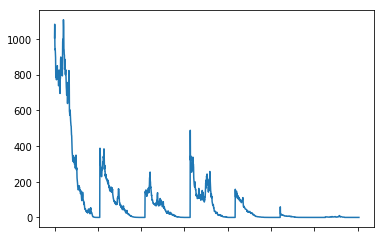

In [7]:
universe.get_security("DJI_365_13000_P").premium.plot()
# try premium, value, delta, vega, price (which here is implied vol)

In [11]:
dates_rebal=[datetime.strftime(item,'%Y-%m-%d') for item in pd.date_range('2014-09-01','2019-06-01',freq='3MS')]
for item in dates_rebal:
    print(universe.get_security("DJI_365_13500_P").underlying.price.reindex(dates_rebal,method='ffill').loc[item])

17098.44922
17776.80078
18132.69922
18040.36914
16058.34961
17888.34961
16865.08008
17789.66992
18419.30078
19191.92969
21115.55078
21144.17969
21987.56055
24231.58984
24608.98047
24635.21094
25964.82031
25538.46094
26026.32031
24815.03906


### fit factor model on underlying

In [ ]:
start_date = "2014-01-01"
window_size = 250 * 5
mdl = universe.fitFactorModel(universe.get_security("DJI_365_13500_P").underlying.ticker, start_date, window_size)

In [ ]:
mdl.params

### fit factor model on vol

In [ ]:
start_date = "2014-01-01"
window_size = 250 * 5
mdl = universe.fitFactorModel("DJI_365_13500_P", start_date, window_size)
mdl.params

### risk attribution

delta * (beta on underlying) + vega * (beta on implied vol)

In [ ]:
a = universe.get_security("DJI_365_13500_P").price.tail(10)
a.index = [n for n in range(10)]
a

### Option Data Cleaning - not important!

In [ ]:
import os
import pandas as pd
from datetime import datetime
dir_path = os.getcwd()
data_path = dir_path + "/Data/"
options = pd.read_csv(data_path+"option/new_DJX_filtered.csv")
options['date'] = [datetime.strptime(str(item), '%Y-%m-%d') for item in options['date']]
options['exdate'] = [datetime.strptime(str(item), '%Y-%m-%d') for item in options['exdate']]
options.head()

In [ ]:
from datetime import timedelta, datetime
datetime.strftimr(timedelta(365*0.5) + datetime(2014, 9, 4), "%Y-%m-%d"

In [ ]:
a = options[(options["exdate"] < datetime.strptime("2014-09-04", '%Y-%m-%d')) & (options["exdate"] > datetime.strptime("2013-09-04", '%Y-%m-%d'))]
#a[options["exdate"] > datetime.strptime("2013-09-04", '%Y-%m-%d')]
a.iloc[0]

In [ ]:
options[(options.exdate == "2012-09-07")][options.cp_flag == "C"][options.strike_price	 == 121]

In [ ]:
options[options.optionid == 65489034]

In [ ]:
(datetime.strptime("2012-09-22", '%Y-%m-%d') - datetime.strptime("2012-09-04", '%Y-%m-%d')).days

In [ ]:
grouped_options = options.groupby(['optionid'])
a = grouped_options.first()
a.shape

In [ ]:
grouped_options.get_group(49506844)

In [ ]:
 int(grouped_options.first().count()[0])

In [ ]:
temp_l = {}
group_options_first = grouped_options.first()
for index in group_options_first.index:
    n = grouped_options.get_group(index).count()[0]
    #print(n)
    T = datetime.strptime(group_options_first["exdate"].loc[index], '%Y-%m-%d') - datetime.strptime(group_options_first["date"].loc[index], '%Y-%m-%d')
    #print(T)
    #for i in range(n):
        #temp_l.append(T)
    temp_l[index] = T
        

In [ ]:
temp_df = pd.DataFrame.from_dict(temp_l,orient='index', columns=['T'])
temp_df.head()

In [ ]:
final_options = options.merge(temp_df, left_on = "optionid", right_index=True )

In [ ]:
set(temp_df[temp_df.columns.tolist()[0]])

In [ ]:
from datetime import timedelta

In [ ]:
chosenT = [timedelta(91), timedelta(365), timedelta(1095)]
chosenT

In [ ]:
final_options[final_options["T"].isin(chosenT)]

In [ ]:
temp = final_options[final_options["T"].isin([timedelta(365),timedelta(364)])]
temp

In [ ]:
options.groupby([])